# Homework 2

## Linear Regression

Linear regression finds a line that minimizes the squared distances to a given set of points.

We will use that line as hypothesis g and compare it to a target function f by measuring the in- and out of sample error.

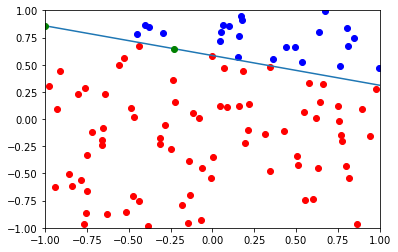

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def rnd(n): 
    return np.random.uniform(-1, 1, size = n)

# choose two random points A, B in [-1,1] x [-1,1]
A = rnd(2)
B = rnd(2)

# the line can be described by y = m*x + b where m is the slope
m = (B[1] - A[1]) / (B[0] - A[0])
b = B[1] - m * B[0]  
w_f = np.array([b, m, -1])

#-----------------------

# Pick N data points (x, y) uniformly from the box [-1,1] x [-1,1]
N = 100
X = np.transpose(np.array([np.ones(N), rnd(N), rnd(N)]))           # input

# Classify these points
y_f = np.sign(np.dot(X, w_f))


# plot points and color them according to their classification
plt.plot(X[:,1][y_f == 1], X[:,2][y_f == 1], 'ro')
plt.plot(X[:,1][y_f == -1], X[:,2][y_f == -1], 'bo')


# plot line
# create some data points on the line (for the plot) using the parametric vector form of a line
# line(t) = A + t * d,  where A is a point on the line, d the directional vector and t the parameter
d = B - A
line_x = [A[0] + t * d[0] for t in range(-10,10)]
line_y = [A[1] + t * d[1] for t in range(-10,10)]
plt.plot(line_x, line_y)

# plot the two points that define the line
plt.plot(A[0], A[1], 'go')            
plt.plot(B[0], B[1], 'go')


# set the ranges for the x and y axis to display the [-1,1] x [-1,1] box
plt.ylim(-1,1)
plt.xlim(-1,1)
plt.show()

#------------------------------------------------------------------------------------------------

check dimensions of y_lr:  (100,)


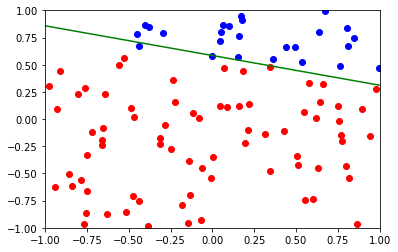

In [2]:
# LINEAR REGRESSION
X_dagger = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
w_lr = np.dot(X_dagger, y_f)


# plot classification according to w found by linear regression
# it shows that some of the points are missclassified
y_lr = np.sign(np.dot(X, w_lr))
print("check dimensions of y_lr: ", y_lr.shape)

# plot points and color them according to their classification
plt.plot(X[:,1][y_lr == 1], X[:,2][y_lr == 1], 'ro')
plt.plot(X[:,1][y_lr == -1], X[:,2][y_lr == -1], 'bo')

# plot the correct classification line (target function)
plt.plot(line_x, line_y, 'g')
plt.ylim(-1,1)
plt.xlim(-1,1)

plt.show()

# Problem 5 and 6

Compute average in- and out of sample error.

In [3]:
# START actual HOMEWORK now
import numpy as np
import matplotlib.pyplot as plt

def rnd(n): 
    return np.random.uniform(-1, 1, size = n)


# repeat the experiment 1000 times
RUNS = 1000
N_sample = 100
E_in_total = 0
E_out_total = 0
N_test = 1000

for run in range(RUNS):
    # choose two random points A, B in [-1,1] x [-1,1]
    A = rnd(2)
    B = rnd(2)

    # the line can be described by y = m*x + b where m is the slope
    m = (B[1] - A[1]) / (B[0] - A[0])
    b = B[1] - m * B[0]  
    w_f = np.array([b, m, -1])

    #-----------------------

    # Create N data points (x, y) from the target function
    X = np.transpose(np.array([np.ones(N_sample), rnd(N_sample), rnd(N_sample)]))           # input
    y_f = np.sign(np.dot(X, w_f))
    
    #-----------------------
    
    # LINEAR REGRESSION
    X_dagger = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    w_lr = np.dot(X_dagger, y_f)
    
    # classification according to w found by linear regression
    y_lr = np.sign(np.dot(X, w_lr))
    
    #------------------------
    
    # Error E_in
    E_in = sum(y_lr != y_f) / N_sample
    E_in_total += E_in

    #------------------------
    # Problem 6: Take 1000 test points (out of sample points) and count disagreement
    # between y_f_test and y_lr_test
    X_test = np.transpose(np.array([np.ones(N_test), rnd(N_test), rnd(N_test)]))
    y_f_test = np.sign(np.dot(X_test, w_f))
    y_lr_test = np.sign(np.dot(X_test, w_lr))
    
    E_out = sum(y_lr_test != y_f_test) / N_test
    E_out_total += E_out
    
    
# Average of E_in over RUNS
E_in_avg = E_in_total / RUNS
print("Average of E_in over", RUNS, " runs:", E_in_avg)

# Average of E_out over RUNS
E_out_avg = E_out_total / RUNS
print("Average of E_out over", RUNS, " runs:", E_out_avg)

Average of E_in over 1000  runs: 0.03938
Average of E_out over 1000  runs: 0.04871
